In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
cd tmp

/home/team9/tmp


In [3]:
ls

data/


In [4]:

cd data

/home/team9/tmp/data


In [5]:
trips = pd.read_csv('rt_trips_DB_2018.txt', sep=";", parse_dates=[1])


In [6]:
weather_trips = pd.read_csv('weather_trips.csv')

In [7]:
weather_trips

,Unnamed: 0,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon
0,0,1483228800,2,10,3,Rain,moderate rain,10n
1,1,1483232400,2,10,2,Rain,moderate rain,10n
2,2,1483236000,2,10,2,Rain,light rain,10n
3,3,1483239600,2,10,3,Rain,light rain,10n
4,4,1483243200,2,10,3,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...
26275,26275,1577818800,3,10,0,Clouds,broken clouds,04n
26276,26276,1577822400,3,10,2,Clouds,overcast clouds,04n
26277,26277,1577826000,3,10,0,Clouds,overcast clouds,04n
26278,26278,1577829600,2,10,0,Clouds,broken clouds,04n


In [8]:
weather_trips = weather_trips.drop(columns=["Unnamed: 0"])


In [9]:
weather_trips.head(3)

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon
0,1483228800,2,10,3,Rain,moderate rain,10n
1,1483232400,2,10,2,Rain,moderate rain,10n
2,1483236000,2,10,2,Rain,light rain,10n


In [10]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,"
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,"


In [11]:
trips.describe()

,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TENDERLOT,SUPPRESSED,JUSTIFICATIONID
count,2.182637e+06,2.182637e+06,2.182637e+06,2.182637e+06,2.045430e+06,2.018086e+06,0.0,4333.0,4330.000000
mean,7.149479e+06,1.504103e+00,5.507875e+04,5.153329e+04,5.506239e+04,5.170612e+04,NaN,0.0,237554.867667
std,7.314423e+05,4.999833e-01,1.742482e+04,1.757164e+04,1.733870e+04,1.752695e+04,NaN,0.0,34585.051789
min,5.955221e+06,1.000000e+00,1.820300e+04,1.620000e+04,1.754600e+04,1.597400e+04,NaN,0.0,177856.000000
25%,6.592584e+06,1.000000e+00,3.968300e+04,3.600000e+04,3.966800e+04,3.651800e+04,NaN,0.0,205506.500000
50%,7.110090e+06,2.000000e+00,5.527600e+04,5.160000e+04,5.518900e+04,5.161800e+04,NaN,0.0,233851.500000
75%,8.018241e+06,2.000000e+00,6.900600e+04,6.516000e+04,6.901900e+04,6.539800e+04,NaN,0.0,271506.750000
max,8.592207e+06,2.000000e+00,9.168000e+04,8.760000e+04,9.437800e+04,9.717700e+04,NaN,0.0,297899.000000


In [12]:
haveDepTime = trips[trips["ACTUALTIME_DEP"].notnull()]
haveDep_ArrTime = haveDepTime[haveDepTime["ACTUALTIME_ARR"].notnull()]
haveDep_ArrTime

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
5,DB,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,DB,2018-05-14,6765652,53,53_21,2,30626,29100,30482.0,29119.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024762,"
2182630,DB,2018-05-14,6765662,53,53_21,2,65950,64800,66270.0,64815.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024821,"
2182631,DB,2018-05-14,6765828,45A,45A_68,1,28647,25800,28688.0,25858.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2448734,"
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,"


In [13]:
print(trips.shape[0] - haveDep_ArrTime.shape[0], 'trips are missing either actual departure or arrival times')

289270 trips are missing either actual departure or arrival times


In [14]:
trips.nunique()

DATASOURCE              1
DAYOFSERVICE          360
TRIPID             658964
LINEID                130
ROUTEID               588
DIRECTION               2
PLANNEDTIME_ARR     64461
PLANNEDTIME_DEP       791
ACTUALTIME_ARR      68122
ACTUALTIME_DEP      66771
BASIN                   1
TENDERLOT               0
SUPPRESSED              1
JUSTIFICATIONID      3526
LASTUPDATE            360
NOTE                46690
dtype: int64

- 360 days of service - seems to be one for every day
- only 650k trip IDs but over 2 million lines - need to see why 

In [15]:
trips.loc[trips['TRIPID']==6765486]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
470885,DB,2018-05-17,6765486,33D,33D_62,2,29460,26400,30676.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:42:42,",3077688,"
2071391,DB,2018-05-18,6765486,33D,33D_62,2,29460,26400,29846.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:52:33,",3077688,"
2172425,DB,2018-05-16,6765486,33D,33D_62,2,29460,26400,30102.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:32:53,",3077688,"
2179562,DB,2018-05-15,6765486,33D,33D_62,2,29460,26400,30403.0,26416.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",3077688,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"


Looks like the trip IDs are sometimes duplicated but on different days. Need to see if they are ever duplicated on the same day

In [16]:
sub_trips = trips[["DAYOFSERVICE", "TRIPID"]]

In [17]:
print(sub_trips.duplicated().sum(), "duplicated trip IDs on the same day.")

0 duplicated trip IDs on the same day.


Therefore trip ID is never reused on the same day.
- Can use it and day as a unique identifier

In [18]:
trips.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
ROUTEID                    object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                      object
TENDERLOT                 float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE                 object
NOTE                       object
dtype: object

Next I will convert the dates to days of the week

In [19]:
trips['DAYOFWEEK'] = trips['DAYOFSERVICE'].dt.weekday

In [20]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",2
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",2
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",2
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",2
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,",0
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,",0
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,",0
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,",0


Next I will determine the hour of departure for the trip and the travel time

In [21]:
# dividing by seconds and minutes
trips['HOUR_DEPARTURE'] = trips['ACTUALTIME_DEP'].apply(lambda row: row//3600)

In [22]:
# getting arrival time minus departure, then dividing by 60 seconds
trips['JOURNEY_TIME'] = (trips['ACTUALTIME_ARR'] - trips['ACTUALTIME_DEP']).apply(lambda row: row/60)

In [23]:
trips['JOURNEY_TIME'].describe()

count    1.893367e+06
mean     6.422932e+01
std      2.391304e+01
min     -2.477667e+02
25%      4.671667e+01
50%      6.286667e+01
75%      8.075000e+01
max      3.909667e+02
Name: JOURNEY_TIME, dtype: float64

In [24]:
trips.loc[trips['SUPPRESSED']==0.0]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
1783,DB,2018-02-18,6269995,45A,45A_60,1,68767,65700,NaN,65746.0,BasDef,NaN,0.0,194642.0,26-FEB-18 11:09:33,",2428302,",6,18.0,NaN
2363,DB,2018-03-16,6399287,41C,41C_78,1,71543,68400,NaN,68643.0,BasDef,NaN,0.0,205589.0,26-MAR-18 12:55:43,",1741586,",4,19.0,NaN
3485,DB,2018-09-28,7758815,13,13_72,2,77076,72000,77726.0,NaN,BasDef,NaN,0.0,271333.0,18-OCT-18 18:30:27,",2589790,",4,NaN,NaN
3873,DB,2018-02-18,6277942,54A,54A_12,2,56910,54000,NaN,53972.0,BasDef,NaN,0.0,194644.0,26-FEB-18 11:09:33,",1752467,",6,14.0,NaN
4353,DB,2018-03-10,6400436,16,16_20,1,66230,61200,NaN,63250.0,BasDef,NaN,0.0,204650.0,19-MAR-18 14:54:09,",1892345,",5,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180333,DB,2018-05-15,6756431,40D,40D_101,1,83064,81000,NaN,80899.0,BasDef,NaN,0.0,231822.0,26-JUN-18 09:23:03,",2837996,",1,22.0,NaN
2181600,DB,2018-05-14,6761229,46A,46A_67,2,62024,56880,61946.0,NaN,BasDef,NaN,0.0,231784.0,26-JUN-18 09:13:13,",3064930,",0,NaN,NaN
2181789,DB,2018-05-15,6759169,66,66_13,2,41797,38100,41937.0,NaN,BasDef,NaN,0.0,231826.0,26-JUN-18 09:23:03,",2295846,",1,NaN,NaN
2182138,DB,2018-05-15,6753428,123,123_34,1,60475,56400,60008.0,NaN,BasDef,NaN,0.0,231813.0,26-JUN-18 09:23:03,",3218907,",1,NaN,NaN


In [25]:
trips.loc[trips['SUPPRESSED']==0.0].describe()

,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
count,4.333000e+03,4333.000000,4333.000000,4333.000000,2202.000000,2576.000000,0.0,4333.0,4330.000000,4333.000000,2576.000000,791.000000
mean,7.078477e+06,1.386568,54876.179321,51063.752596,54927.642598,51024.471661,NaN,0.0,237554.867667,2.782368,13.685947,78.655162
std,7.280043e+05,0.487019,14723.724563,14726.980330,14974.037460,14625.331959,NaN,0.0,34585.051789,1.876974,4.061992,34.276970
min,5.955374e+06,1.000000,20621.000000,18900.000000,23058.000000,19069.000000,NaN,0.0,177856.000000,0.000000,5.000000,0.316667
25%,6.394961e+06,1.000000,42748.000000,39600.000000,43299.250000,38748.250000,NaN,0.0,205506.500000,1.000000,10.000000,54.925000
50%,6.871374e+06,1.000000,55253.000000,51300.000000,56069.000000,49778.500000,NaN,0.0,233851.500000,3.000000,13.000000,71.300000
75%,7.781073e+06,2.000000,66311.000000,62400.000000,66084.000000,62684.250000,NaN,0.0,271506.750000,4.000000,17.000000,99.308333
max,8.591894e+06,2.000000,88164.000000,84600.000000,87978.000000,84607.000000,NaN,0.0,297899.000000,6.000000,23.000000,200.866667


Not sure why there would be a negative - will investigate

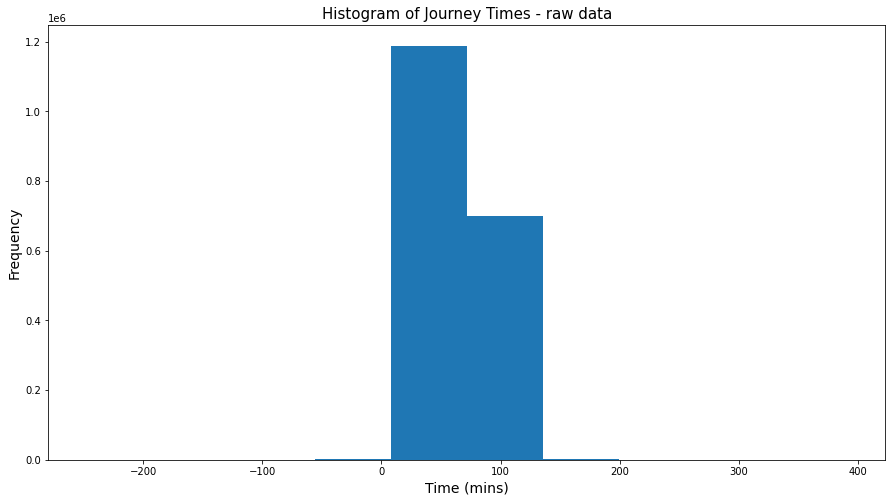

In [26]:
# plotting the journey time data
plt.figure(figsize=(15,8))
plt.title("Histogram of Journey Times - raw data", fontsize=15)
plt.xlabel("Time (mins)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.hist(trips['JOURNEY_TIME'])

plt.show()

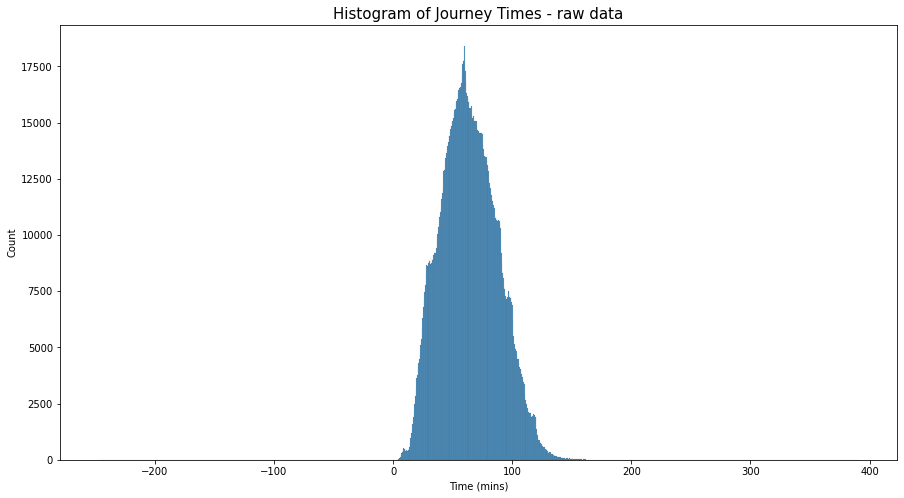

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(trips['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (mins)')

plt.title('Histogram of Journey Times - raw data')
plt.show()



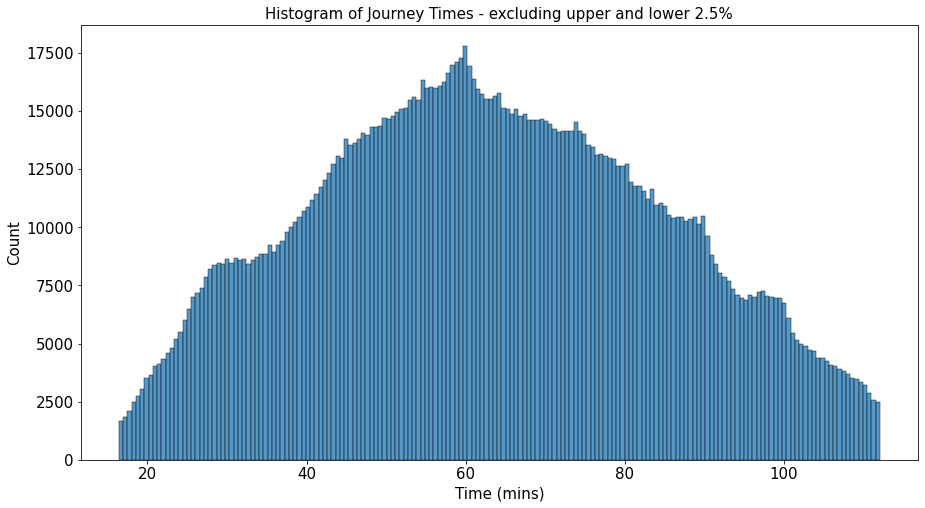

In [28]:
# calculate value 2 standard deviations above the mean
topTwoSDs = trips['JOURNEY_TIME'].mean() + (2*trips['JOURNEY_TIME'].std())
bottomTwoSDs = trips['JOURNEY_TIME'].mean() - (2*trips['JOURNEY_TIME'].std())
tripsNoOutliers = trips.loc[trips['JOURNEY_TIME'] < topTwoSDs]
tripsNoOutliers = tripsNoOutliers.loc[trips['JOURNEY_TIME'] > bottomTwoSDs]



fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(tripsNoOutliers['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (mins)')

plt.title('Histogram of Journey Times - excluding upper and lower 2.5%')
plt.show()

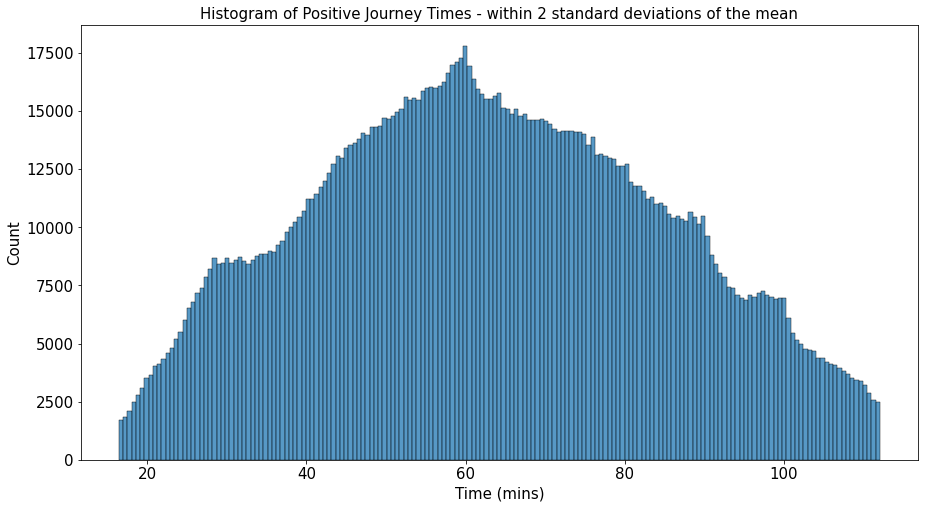

In [29]:
# calculate value 2 standard deviations above the mean
noNegTrips = trips.loc[trips['JOURNEY_TIME'] > 0]
topTwoSDs = noNegTrips['JOURNEY_TIME'].mean() + (2*noNegTrips['JOURNEY_TIME'].std())
bottomTwoSDs = noNegTrips['JOURNEY_TIME'].mean() - (2*noNegTrips['JOURNEY_TIME'].std())
tripsNoOutliers = noNegTrips.loc[noNegTrips['JOURNEY_TIME'] < topTwoSDs]
tripsNoOutliers = tripsNoOutliers.loc[tripsNoOutliers['JOURNEY_TIME'] > bottomTwoSDs]



fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(tripsNoOutliers['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (mins)')

plt.title('Histogram of Positive Journey Times - within 2 standard deviations of the mean')
plt.show()

In [30]:
print(tripsNoOutliers['JOURNEY_TIME'].max())
print(tripsNoOutliers['JOURNEY_TIME'].min())

112.03333333333333
16.433333333333334


In [31]:
bottomTwoSDs

16.430551337320423

In [32]:
noNegTrips.loc[noNegTrips['JOURNEY_TIME']<0.2]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
1121264,DB,2018-03-22,6394554,43,43_88,2,70675,68400,71702.0,71701.0,BasDef,NaN,NaN,NaN,04-APR-18 08:59:06,",2632952,",3,19.0,0.016667
1939153,DB,2018-11-14,8121047,33A,33A_22,1,64398,61200,65607.0,65606.0,BasDef,NaN,NaN,NaN,22-NOV-18 13:39:08,",1734800,",2,18.0,0.016667
2166184,DB,2018-01-02,5963180,44B,44B_60,1,29686,27900,29370.0,29367.0,BasDef,NaN,NaN,NaN,09-JAN-18 20:18:05,",1720843,",1,8.0,0.050000


Seems as though these rows should be dropped

In [33]:
trips = trips.loc[trips['JOURNEY_TIME']>0]

In [34]:
shorts = trips.loc[trips['JOURNEY_TIME']<10]

In [35]:
shorts.nunique()

DATASOURCE            1
DAYOFSERVICE        314
TRIPID             1256
LINEID               50
ROUTEID              72
DIRECTION             2
PLANNEDTIME_ARR     678
PLANNEDTIME_DEP      93
ACTUALTIME_ARR     2429
ACTUALTIME_DEP     2140
BASIN                 1
TENDERLOT             0
SUPPRESSED            1
JUSTIFICATIONID       7
LASTUPDATE          314
NOTE                163
DAYOFWEEK             7
HOUR_DEPARTURE       18
JOURNEY_TIME        347
dtype: int64

- check online found that ther atually were routes which were extremely short (eg 185) so it is difficult to tell which pieces of data are wrong.
- clear that not all are valid though as the second line from the bottom is the 46a which is a long route.


Once I have the data split into the bus routes I will remove the top and bottom 2.5% from each

In [29]:
print(len(trips.loc[trips['JOURNEY_TIME']<5]))

67


In [36]:
short_5 = trips.loc[trips['JOURNEY_TIME']<5]

In [37]:
short_5

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
41164,DB,2018-12-30,8585049,41C,41C_83,1,74734,72000,72379.0,72328.0,BasDef,NaN,NaN,NaN,16-JAN-19 18:16:31,",3378321,",6,20.0,0.850000
93542,DB,2018-02-06,6256812,111,111_10,2,84911,84600,84861.0,84568.0,BasDef,NaN,NaN,NaN,28-FEB-18 11:48:21,",2789836,",1,23.0,4.883333
96152,DB,2018-10-12,8019985,77A,77A_29,1,83101,79200,82931.0,82813.0,BasDef,NaN,NaN,NaN,20-NOV-18 15:30:07,",2965213,2965213,",4,23.0,1.966667
101351,DB,2018-01-15,6120858,111,111_10,2,84951,84600,84856.0,84578.0,BasDef,NaN,NaN,NaN,23-JAN-18 10:24:03,",2789836,",0,23.0,4.633333
137971,DB,2018-03-20,6402084,111,111_10,2,84981,84600,84871.0,84597.0,BasDef,NaN,NaN,NaN,28-MAR-18 15:03:15,",2789836,",1,23.0,4.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090487,DB,2018-04-02,6590622,17A,17A_13,2,68376,64800,68602.0,68358.0,BasDef,NaN,NaN,NaN,10-APR-18 15:19:02,",1722094,1722094,",0,18.0,4.066667
2102508,DB,2018-11-01,8068163,150,150_8,1,75603,73800,76167.0,75920.0,BasDef,NaN,NaN,NaN,29-NOV-18 07:38:40,",2961346,2961346,",3,21.0,4.116667
2148455,DB,2018-05-22,6782309,4,4_10,1,60314,55800,60885.0,60845.0,BasDef,NaN,NaN,NaN,13-JUN-18 18:52:05,",2615620,2615620,",1,16.0,0.666667
2157391,DB,2018-05-28,6846997,185,185_57,2,56855,56400,56393.0,56099.0,BasDef,NaN,NaN,NaN,14-JUN-18 13:31:37,",2817949,",0,15.0,4.900000


- noticeably less routes under 5 minutes and upon inspection some of the routes (111, 44b, 4, 41c )on moovit it was clear that they were corrupted data

In [38]:
# trips = trips.loc[trips['JOURNEY_TIME']>5]

Below I am creating a new categorical column, with each category representing a route in a particular direction

In [39]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",2,23.0,48.733333
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",2,8.0,70.783333
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",2,15.0,67.000000
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",2,22.0,51.233333
5,DB,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,",2,10.0,74.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,DB,2018-05-14,6765652,53,53_21,2,30626,29100,30482.0,29119.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024762,",0,8.0,22.716667
2182630,DB,2018-05-14,6765662,53,53_21,2,65950,64800,66270.0,64815.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024821,",0,18.0,24.250000
2182631,DB,2018-05-14,6765828,45A,45A_68,1,28647,25800,28688.0,25858.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2448734,",0,7.0,47.166667
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,",0,16.0,58.433333


- before splitting into seperate routes to analyse I'm removing unnecessary columns and adding the weather data.

In [36]:
trips = trips.drop({'TENDERLOT', "JUSTIFICATIONID", "DATASOURCE", "LASTUPDATE", "NOTE","BASIN", "ROUTEID"}, axis=1)


In [40]:
trips

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
0,2018-02-07,6253783,68,1,87245,84600,87524.0,84600.0,2,23.0,48.733333
2,2018-02-07,6254942,45A,2,35512,32100,36329.0,32082.0,2,8.0,70.783333
3,2018-02-07,6259460,25A,1,57261,54420,58463.0,54443.0,2,15.0,67.000000
4,2018-02-07,6253175,14,1,85383,81600,84682.0,81608.0,2,22.0,51.233333
5,2018-02-07,6248240,77A,2,41648,37200,42019.0,37538.0,2,10.0,74.683333
...,...,...,...,...,...,...,...,...,...,...,...
2182629,2018-05-14,6765652,53,2,30626,29100,30482.0,29119.0,0,8.0,22.716667
2182630,2018-05-14,6765662,53,2,65950,64800,66270.0,64815.0,0,18.0,24.250000
2182631,2018-05-14,6765828,45A,1,28647,25800,28688.0,25858.0,0,7.0,47.166667
2182632,2018-05-14,6765849,123,2,61560,57840,61365.0,57859.0,0,16.0,58.433333


In [35]:
trips.dtypes

DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
DAYOFWEEK                   int64
HOUR_DEPARTURE            float64
JOURNEY_TIME              float64
dtype: object

In [36]:
weather_trips.dtypes

dt                      int64
temp                    int64
visibility              int64
wind_speed              int64
weather_main           object
weather_description    object
weather_icon           object
dtype: object

In [41]:
def date_from_epoch(x):
    y = dt.datetime.fromtimestamp (x).strftime('%Y-%m-%d')
    return y   

weather_trips['DAYOFSERVICE'] = weather_trips['dt'].apply(lambda x: date_from_epoch(x))

In [38]:
weather_trips

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,DAYOFSERVICE
0,1483228800,2,10,3,Rain,moderate rain,10n,2017-01-01
1,1483232400,2,10,2,Rain,moderate rain,10n,2017-01-01
2,1483236000,2,10,2,Rain,light rain,10n,2017-01-01
3,1483239600,2,10,3,Rain,light rain,10n,2017-01-01
4,1483243200,2,10,3,Clouds,broken clouds,04n,2017-01-01
...,...,...,...,...,...,...,...,...
26275,1577818800,3,10,0,Clouds,broken clouds,04n,2019-12-31
26276,1577822400,3,10,2,Clouds,overcast clouds,04n,2019-12-31
26277,1577826000,3,10,0,Clouds,overcast clouds,04n,2019-12-31
26278,1577829600,2,10,0,Clouds,broken clouds,04n,2019-12-31


In [39]:
def round_epoch_hour(x):
    day = x // 86400
    day = day * 86400
    time = x - day
    round_time = time // 3600
    return round_time

In [40]:
weather_trips['HOUR_DEPARTURE'] = weather_trips['dt'].apply(lambda x: round_epoch_hour(x))

In [41]:
weather_trips

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,DAYOFSERVICE,HOUR_DEPARTURE
0,1483228800,2,10,3,Rain,moderate rain,10n,2017-01-01,0
1,1483232400,2,10,2,Rain,moderate rain,10n,2017-01-01,1
2,1483236000,2,10,2,Rain,light rain,10n,2017-01-01,2
3,1483239600,2,10,3,Rain,light rain,10n,2017-01-01,3
4,1483243200,2,10,3,Clouds,broken clouds,04n,2017-01-01,4
...,...,...,...,...,...,...,...,...,...
26275,1577818800,3,10,0,Clouds,broken clouds,04n,2019-12-31,19
26276,1577822400,3,10,2,Clouds,overcast clouds,04n,2019-12-31,20
26277,1577826000,3,10,0,Clouds,overcast clouds,04n,2019-12-31,21
26278,1577829600,2,10,0,Clouds,broken clouds,04n,2019-12-31,22


In [42]:
weather_trips.dtypes

dt                      int64
temp                    int64
visibility              int64
wind_speed              int64
weather_main           object
weather_description    object
weather_icon           object
DAYOFSERVICE           object
HOUR_DEPARTURE          int64
dtype: object

In [43]:
weather_trips = weather_trips.fillna(-1)

In [44]:
weather_trips["DAYOFSERVICE"] =  weather_trips["DAYOFSERVICE"].astype("datetime64[ns]") 
weather_trips["weather_description"] =  weather_trips["weather_description"].astype("int8")
weather_trips["weather_icon"] =  weather_trips["weather_icon"].astype("int8") 
weather_trips["HOUR_DEPARTURE"] =  weather_trips["HOUR_DEPARTURE"].astype("int8") 



ValueError: invalid literal for int() with base 10: 'moderate rain'

In [ ]:
trips.dtypes

In [ ]:
trips["HOUR_DEPARTURE"] =  trips["HOUR_DEPARTURE"].astype("int8") 
trips["ACTUALTIME_ARR"] =  trips["ACTUALTIME_ARR"].astype("int64") 
trips["ACTUALTIME_DEP"] =  trips["ACTUALTIME_DEP"].astype("int64") 

In [ ]:
trips = pd.merge(trips, weather_trips, on=['DAYOFSERVICE', 'HOUR_DEPARTURE'], how='left')


In [ ]:
trips.isnull().sum()

In [ ]:
nulls = trips['temp'].isnull() | trips['visibility'].isnull() | trips['wind_speed'].isnull() | trips['weather_description'].isnull() | trips['weather_icon'].isnull()


In [ ]:
trips[nulls]

In [ ]:
trips['temp'] = trips['temp'].fillna(-1)
trips['visibility'] = trips['visibility'].fillna(-1)
trips['wind_speed'] = trips['wind_speed'].fillna(-1)
trips['weather_description'] = trips['weather_description'].fillna(-1)
trips['weather_icon'] = trips['weather_icon'].fillna(-1)

In [ ]:
trips[nulls]

##### Decided to remove all of the rows without weather data as it would cause unnecessary confusion to the model.

In [ ]:
trips = trips[trips.temp != -1]


In [54]:
trips.dtypes

DAYOFSERVICE           datetime64[ns]
TRIPID                          int64
LINEID                         object
DIRECTION                       int64
PLANNEDTIME_ARR                 int64
PLANNEDTIME_DEP                 int64
ACTUALTIME_ARR                  int64
ACTUALTIME_DEP                  int64
DAYOFWEEK                       int64
HOUR_DEPARTURE                   int8
JOURNEY_TIME                  float64
dt                            float64
temp                          float64
visibility                    float64
wind_speed                    float64
weather_description           float64
weather_icon                  float64
dtype: object

- creating column to divide journeys by direction
- using line id instead of route id because it isn't necessary for the basic modelling as we have no stop information in the trips file.

In [55]:
trips['LINE_DIRECTION'] = trips['LINEID'] + '_' + trips['DIRECTION'].astype(str)

In [56]:
trips['LINE_DIRECTION'] = trips['LINE_DIRECTION'].astype('category')

In [57]:
print(len(trips['LINE_DIRECTION'].unique().tolist()),'categories')

252 categories


In [58]:
trips = trips.drop({"DIRECTION", "LINEID", "dt"}, axis=1)


##### creating temporry columns to identify outliers 

In [59]:
trips['planned_journey_time'] = (trips['PLANNEDTIME_ARR'] - trips['PLANNEDTIME_DEP']).apply(lambda row: row/60)

In [60]:
trips["error"] = (trips["JOURNEY_TIME"] - trips['planned_journey_time'])

In [61]:
trips

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error
0,2018-02-07,6253783,87245,84600,87524,84600,2,23,48.733333,2.0,10.0,4.0,6.0,9.0,68_1,44.083333,4.650000
1,2018-02-07,6254942,35512,32100,36329,32082,2,8,70.783333,1.0,10.0,2.0,19.0,4.0,45A_2,56.866667,13.916667
2,2018-02-07,6259460,57261,54420,58463,54443,2,15,67.000000,2.0,10.0,3.0,6.0,8.0,25A_1,47.350000,19.650000
3,2018-02-07,6253175,85383,81600,84682,81608,2,22,51.233333,2.0,10.0,4.0,0.0,7.0,14_1,63.050000,-11.816667
4,2018-02-07,6248240,41648,37200,42019,37538,2,10,74.683333,1.0,10.0,3.0,0.0,6.0,77A_2,74.133333,0.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893305,2018-05-14,6765652,30626,29100,30482,29119,0,8,22.716667,3.0,10.0,2.0,0.0,6.0,53_2,25.433333,-2.716667
1893306,2018-05-14,6765662,65950,64800,66270,64815,0,18,24.250000,4.0,10.0,0.0,0.0,6.0,53_2,19.166667,5.083333
1893307,2018-05-14,6765828,28647,25800,28688,25858,0,7,47.166667,3.0,10.0,1.0,0.0,6.0,45A_1,47.450000,-0.283333
1893308,2018-05-14,6765849,61560,57840,61365,57859,0,16,58.433333,4.0,10.0,1.0,0.0,6.0,123_2,62.000000,-3.566667


In [62]:
trips.describe()

,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_description,weather_icon,planned_journey_time,error
count,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06,1.893310e+06
mean,7.149043e+06,5.481967e+04,5.129982e+04,5.518961e+04,5.133551e+04,2.710721e+00,1.377588e+01,6.423509e+01,3.206798e+00,9.608797e+00,2.701639e+00,6.544822e+00,6.325883e+00,5.866421e+01,5.570879e+00
std,7.300933e+05,1.728458e+04,1.743498e+04,1.728065e+04,1.744016e+04,1.879703e+00,4.857169e+00,2.389990e+01,1.171315e+00,1.428380e+00,1.356041e+00,7.409630e+00,3.120299e+00,2.099500e+01,9.609191e+00
min,5.955221e+06,1.820300e+04,1.620000e+04,1.754600e+04,1.618700e+04,0.000000e+00,4.000000e+00,5.016667e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,4.633333e+00,-1.842167e+02
25%,6.594336e+06,3.962200e+04,3.600000e+04,3.993800e+04,3.605500e+04,1.000000e+00,1.000000e+01,4.671667e+01,2.000000e+00,1.000000e+01,2.000000e+00,0.000000e+00,4.000000e+00,4.345000e+01,-1.666667e-01
50%,7.110453e+06,5.481600e+04,5.112000e+04,5.522450e+04,5.118000e+04,3.000000e+00,1.400000e+01,6.286667e+01,3.000000e+00,1.000000e+01,3.000000e+00,2.000000e+00,6.000000e+00,5.805000e+01,4.300000e+00
75%,8.017401e+06,6.865200e+04,6.480000e+04,6.907400e+04,6.484200e+04,4.000000e+00,1.800000e+01,8.075000e+01,4.000000e+00,1.000000e+01,3.000000e+00,9.000000e+00,8.000000e+00,7.385000e+01,1.005000e+01
max,8.592207e+06,9.168000e+04,8.760000e+04,9.437800e+04,8.899300e+04,6.000000e+00,2.400000e+01,3.909667e+02,6.000000e+00,1.000000e+01,9.000000e+00,2.700000e+01,1.600000e+01,2.402833e+02,3.484500e+02


In [63]:
trips.error.max()

348.45

In [64]:
trips.error.min()

-184.21666666666667

- Average error is 5.57 minutes
- Obviously some incorrect data if a line can be almost 4 hours early
- Top 25 percentile is 10 minutes late.
- Bottom 25 percentile is 16 minutes early.
- Likely that some particular bus lines are very infrequent, with large error (based on my personal experience).
- Don't want to be too strict with outliers as it is likely that there are certain days of the year where long delays are extremely common. eg pride day or saint patrick's day
- Early arrivals will 
###### Decided to set outlier mark at 20 minutes early and late.

In [65]:
trips = trips[(trips.error < 20) & (trips.error > -20)]


In [66]:
trips.error.max()

19.999999999999993

In [67]:
trips.error.min()

-19.999999999999993

In [68]:
fortySixA1 = trips.loc[trips['LINE_DIRECTION']=="46A_1"]

In [69]:
sixteen = trips.loc[trips['LINE_DIRECTION']=="16_1"]

In [70]:
onefourfive = trips.loc[trips['LINE_DIRECTION']=="145_1"]

In [71]:
fortySixA1

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error
14,2018-02-07,6253924,65768,60960,66075,60926,2,16,85.816667,2.0,10.0,3.0,9.0,10.0,46A_1,80.133333,5.683333
19,2018-02-07,6262164,28877,24480,29657,24697,2,6,82.666667,1.0,10.0,3.0,2.0,3.0,46A_1,73.283333,9.383333
185,2018-03-11,6397655,86458,83700,87190,83653,6,23,58.950000,2.0,8.0,2.0,9.0,11.0,46A_1,45.966667,12.983333
186,2018-03-11,6392156,80158,77400,80661,77400,6,21,54.350000,2.0,10.0,2.0,9.0,11.0,46A_1,45.966667,8.383333
187,2018-03-11,6392515,78358,75600,78412,75633,6,21,46.316667,2.0,10.0,2.0,9.0,11.0,46A_1,45.966667,0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892997,2018-05-15,6763274,39339,35040,39593,35040,1,9,75.883333,4.0,10.0,2.0,0.0,6.0,46A_1,71.650000,4.233333
1893028,2018-05-15,6753808,62027,57120,61827,57111,1,15,78.600000,4.0,10.0,2.0,7.0,8.0,46A_1,81.783333,-3.183333
1893153,2018-05-15,6764906,49598,45120,49279,45157,1,12,68.700000,4.0,10.0,2.0,0.0,6.0,46A_1,74.633333,-5.933333
1893165,2018-05-15,6762038,65510,60480,66254,60456,1,16,96.633333,4.0,10.0,3.0,9.0,10.0,46A_1,83.833333,12.800000


In [72]:
onefourfive

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error
136,2018-02-18,6263611,57297,52800,57733,52807,6,14,82.100000,3.0,10.0,2.0,7.0,8.0,145_1,74.950000,7.150000
137,2018-02-18,6267386,58497,54000,58711,53932,6,14,79.650000,3.0,10.0,2.0,7.0,8.0,145_1,74.950000,4.700000
138,2018-02-18,6265005,59697,55200,60354,55198,6,15,85.933333,3.0,10.0,2.0,6.0,8.0,145_1,74.950000,10.983333
156,2018-03-16,6398012,59653,54600,60906,54684,4,15,103.700000,3.0,10.0,3.0,0.0,6.0,145_1,84.216667,19.483333
394,2018-09-26,7772930,43020,38400,42752,38377,2,10,72.916667,5.0,10.0,3.0,0.0,6.0,145_1,77.000000,-4.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892594,2018-05-15,6758030,57485,52200,57834,52158,1,14,94.600000,4.0,10.0,3.0,0.0,6.0,145_1,88.083333,6.516667
1892595,2018-05-15,6758032,70321,64800,70973,64845,1,18,102.133333,3.0,10.0,4.0,9.0,10.0,145_1,92.016667,10.116667
1892638,2018-05-14,6763441,72934,68400,73025,68379,0,18,77.433333,4.0,10.0,0.0,0.0,6.0,145_1,75.566667,1.866667
1892741,2018-05-15,6752030,70921,65400,71747,65683,1,18,101.066667,3.0,10.0,4.0,9.0,10.0,145_1,92.016667,9.050000


In [73]:
sixteen

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error
6,2018-02-07,6262909,43936,38880,43721,38955,2,10,79.433333,1.0,10.0,3.0,0.0,6.0,16_1,84.266667,-4.833333
37,2018-02-18,6268387,37539,33600,37884,33710,6,9,69.566667,2.0,10.0,2.0,0.0,6.0,16_1,65.650000,3.916667
38,2018-02-18,6277453,35139,31200,35178,31224,6,8,65.900000,2.0,10.0,2.0,0.0,6.0,16_1,65.650000,0.250000
39,2018-02-18,6277810,36339,32400,36783,32587,6,9,69.933333,2.0,10.0,2.0,0.0,6.0,16_1,65.650000,4.283333
301,2018-03-16,6389258,85306,81000,86086,81271,4,22,80.250000,2.0,10.0,4.0,0.0,7.0,16_1,71.766667,8.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892341,2018-05-15,6756138,44916,39600,44904,39608,1,11,88.266667,4.0,10.0,3.0,7.0,8.0,16_1,88.600000,-0.333333
1892367,2018-05-14,6753654,50234,44640,51017,44672,0,12,105.750000,4.0,10.0,2.0,0.0,6.0,16_1,93.233333,12.516667
1892683,2018-05-15,6752489,61241,55200,61587,55206,1,15,106.350000,4.0,10.0,2.0,7.0,8.0,16_1,100.683333,5.666667
1892916,2018-05-14,6763712,56714,51120,56738,51082,0,14,94.266667,4.0,10.0,2.0,0.0,6.0,16_1,93.233333,1.033333


In [74]:
fortySixA1.describe()

,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_description,weather_icon,planned_journey_time,error
count,3.369800e+04,33698.000000,33698.000000,33698.000000,33698.000000,33698.000000,33698.000000,33698.000000,33698.000000,33698.000000,33698.000000,33698.000000,33698.000000,33698.000000,33698.000000
mean,7.138627e+06,55390.017716,51369.096682,55615.235296,51389.293371,2.721467,13.774556,70.432365,3.178913,9.594368,2.725681,6.529942,6.355392,67.015351,3.417015
std,7.381391e+05,16889.919420,17090.452576,16911.443900,17087.923435,1.912652,4.746762,13.590074,1.166832,1.449268,1.365534,7.373252,3.124609,11.645360,7.401134
min,5.955251e+06,20507.000000,18900.000000,20611.000000,18798.000000,0.000000,5.000000,6.150000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.900000,-19.933333
25%,6.583714e+06,40781.000000,36900.000000,40974.750000,36893.250000,1.000000,10.000000,62.333333,2.000000,10.000000,2.000000,0.000000,4.000000,60.183333,-1.566667
50%,7.021988e+06,55473.000000,51360.000000,55755.000000,51285.000000,3.000000,14.000000,71.450000,3.000000,10.000000,3.000000,2.000000,6.000000,68.333333,3.333333
75%,8.019688e+06,69430.250000,64800.000000,69658.750000,64947.500000,4.000000,18.000000,79.666667,4.000000,10.000000,3.000000,9.000000,8.000000,75.000000,8.600000
max,8.591174e+06,87162.000000,84600.000000,88129.000000,85047.000000,6.000000,23.000000,107.150000,6.000000,10.000000,9.000000,27.000000,16.000000,90.233333,20.000000


In [75]:
sixteen.describe()

,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_description,weather_icon,planned_journey_time,error
count,1.955500e+04,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000
mean,7.155119e+06,55952.943748,50777.596523,56260.249143,50871.253234,2.731936,13.670928,89.816598,3.197545,9.612580,2.733316,6.548044,6.304781,86.255787,3.560811
std,7.466513e+05,16455.849810,16456.694405,16458.777820,16461.936866,1.933655,4.555329,13.626760,1.151771,1.411044,1.372747,7.383300,3.099254,11.479971,8.132427
min,5.955277e+06,24680.000000,21600.000000,24248.000000,21572.000000,0.000000,5.000000,44.066667,0.000000,0.000000,0.000000,0.000000,0.000000,51.333333,-19.933333
25%,6.591168e+06,42153.000000,37200.000000,42362.000000,37238.500000,1.000000,10.000000,80.700000,2.000000,10.000000,2.000000,0.000000,4.000000,78.300000,-1.966667
50%,7.101326e+06,55314.000000,49680.000000,55825.000000,49937.000000,3.000000,13.000000,90.633333,3.000000,10.000000,3.000000,2.000000,6.000000,87.333333,3.800000
75%,8.023250e+06,68852.000000,63000.000000,69391.000000,63293.500000,4.000000,17.000000,99.316667,4.000000,10.000000,3.000000,9.000000,8.000000,93.883333,9.583333
max,8.591828e+06,87508.000000,82800.000000,88256.000000,83217.000000,6.000000,23.000000,131.566667,6.000000,10.000000,9.000000,27.000000,16.000000,115.766667,19.983333


In [76]:
onefourfive.describe()

,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_description,weather_icon,planned_journey_time,error
count,2.589200e+04,25892.000000,25892.000000,25892.000000,25892.000000,25892.000000,25892.000000,25892.000000,25892.000000,25892.000000,25892.000000,25892.000000,25892.000000,25892.000000,25892.000000
mean,7.122994e+06,56685.500386,52028.518461,56977.930712,52062.487332,2.574772,13.960915,81.924056,3.202920,9.628109,2.736366,6.602773,6.312992,77.616365,4.307691
std,7.287119e+05,16737.005786,16741.444892,16750.053746,16745.961193,1.841360,4.653198,13.839961,1.160448,1.389389,1.347797,7.434260,3.118119,11.754250,7.699677
min,5.955476e+06,26357.000000,22800.000000,25672.000000,22712.000000,0.000000,6.000000,17.533333,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,29.400000,-19.966667
25%,6.592955e+06,41788.000000,37200.000000,42119.750000,37312.500000,1.000000,10.000000,73.850000,2.000000,10.000000,2.000000,0.000000,4.000000,71.433333,-0.950000
50%,7.029136e+06,57293.000000,52200.000000,57557.500000,52190.500000,2.000000,14.000000,82.650000,3.000000,10.000000,3.000000,2.000000,6.000000,77.750000,4.500000
75%,8.015439e+06,70425.500000,65400.000000,70799.000000,65414.750000,4.000000,18.000000,91.283333,4.000000,10.000000,3.000000,9.000000,8.000000,85.650000,10.000000
max,8.591856e+06,88657.000000,84300.000000,89563.000000,84702.000000,6.000000,23.000000,118.900000,6.000000,10.000000,9.000000,27.000000,16.000000,100.366667,19.983333


In [77]:
sixteen.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
DAYOFWEEK                        int64
HOUR_DEPARTURE                    int8
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_description            float64
weather_icon                   float64
LINE_DIRECTION                category
planned_journey_time           float64
error                          float64
dtype: object

In [78]:
fortySixA1['DAYOFWEEK'] = fortySixA1['DAYOFWEEK'].astype('category')
sixteen['DAYOFWEEK'] = sixteen['DAYOFWEEK'].astype('category')
onefourfive['DAYOFWEEK'] = onefourfive['DAYOFWEEK'].astype('category')

/tmp/ipykernel_10627/2633204101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fortySixA1['DAYOFWEEK'] = fortySixA1['DAYOFWEEK'].astype('category')
/tmp/ipykernel_10627/2633204101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sixteen['DAYOFWEEK'] = sixteen['DAYOFWEEK'].astype('category')
/tmp/ipykernel_10627/2633204101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

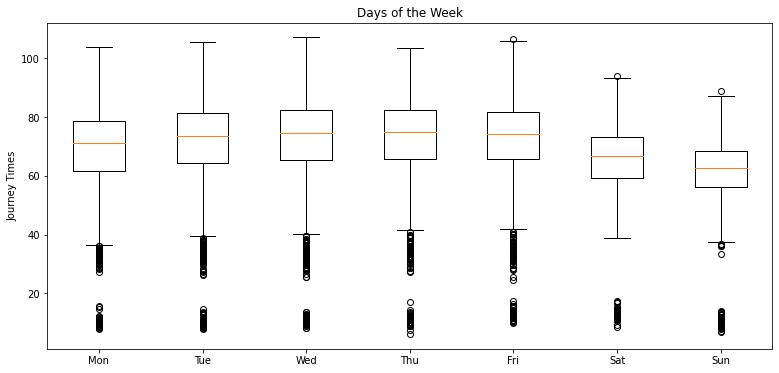

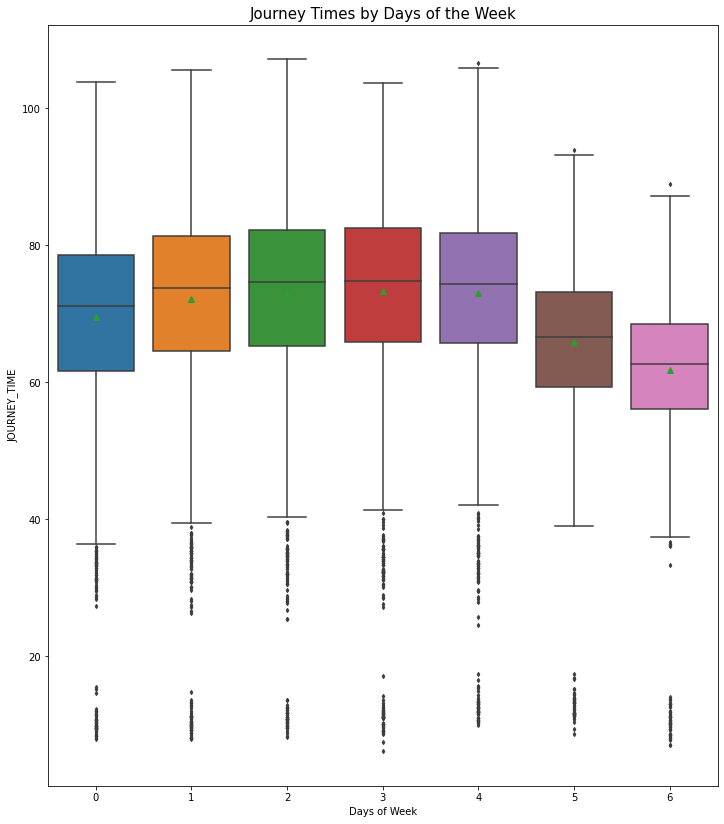

In [79]:
plt.figure(figsize=(13, 6))
Mon = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 0]["JOURNEY_TIME"]
Tue = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 1]["JOURNEY_TIME"]
Wed = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 2]["JOURNEY_TIME"]
Thu = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 3]["JOURNEY_TIME"]
Fri = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 4]["JOURNEY_TIME"]
Sat = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 5]["JOURNEY_TIME"]
Sun = fortySixA1.loc[fortySixA1["DAYOFWEEK"] == 6]["JOURNEY_TIME"]


labels =["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.boxplot([Mon, Tue, Wed, Thu, Fri, Sat, Sun], labels=labels)

plt.title("Days of the Week")
plt.ylabel("Journey Times")
plt.show()

fig, ax = plt.subplots(figsize=(12,14))
# means = train['Price(€)'].groupby(train["County"]).mean().sort_values().index
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.boxplot(x = fortySixA1['DAYOFWEEK'], y=fortySixA1['JOURNEY_TIME'], fliersize = 3, showmeans = True)
plt.xlabel('Days of Week')

plt.title('Journey Times by Days of the Week')
plt.show()

<AxesSubplot:xlabel='Days of the Week', ylabel='Journey Times Average'>

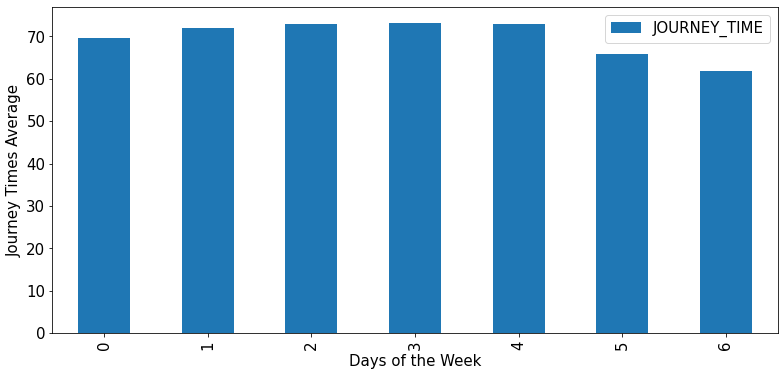

In [80]:
fortySixA1.groupby(by ="DAYOFWEEK").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(13, 6), ylabel="Journey Times Average", xlabel="Days of the Week")

 - There is noticeably more dispersion of journey times on days 1 to 5, with day 7 being the shortest and most consistent time for the bus route.
 - The fact thart there is a noticeable variation by day suggests that this feature will give some value in predicting the target feature.
##### removing outliers is based off of this information but must be done earlier, before the dataframe was divided by route and direction.

<AxesSubplot:xlabel='Time of the Day', ylabel='Journey Times Average'>

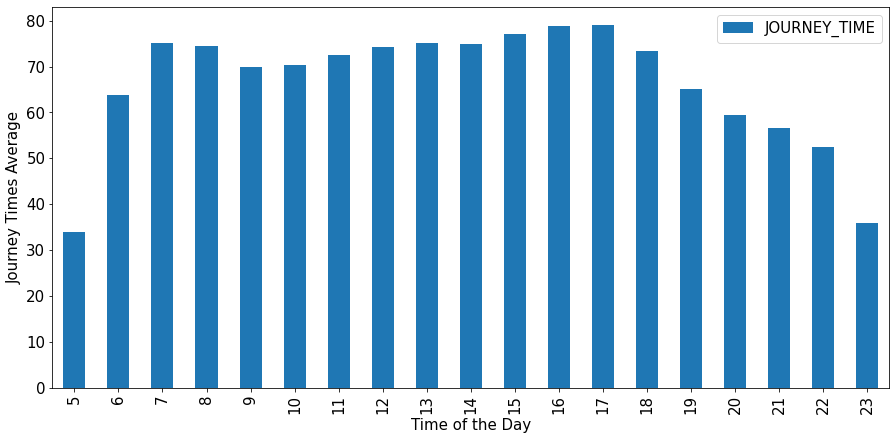

In [81]:
fortySixA1.groupby(by ="HOUR_DEPARTURE").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Time of the Day")


- The time of day feature shows a large variation in journey times, with an expectedly lower journey time in the early hours of the morning and longer journey times during traditional work start and finish times.
- This will likely be a highly leveraged feature in the ML model.

<AxesSubplot:xlabel='Temperature Categoris (cold to warm)', ylabel='Journey Times Average'>

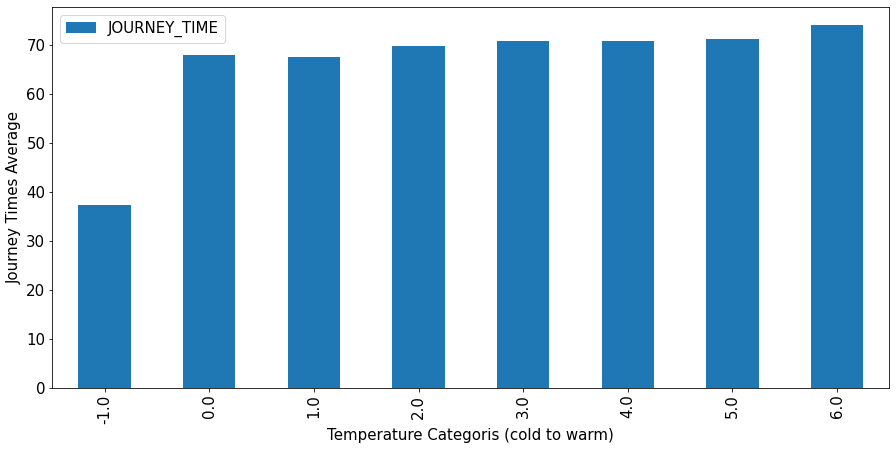

In [82]:

fortySixA1.groupby(by ="temp").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Temperature Categoris (cold to warm)")

- The temperature feature show a very slight change in journey times, with a gradual increase when the weather is warmer as well as an increase when the weather drops below zero.


<AxesSubplot:xlabel='Weather Icon', ylabel='Journey Times Average'>

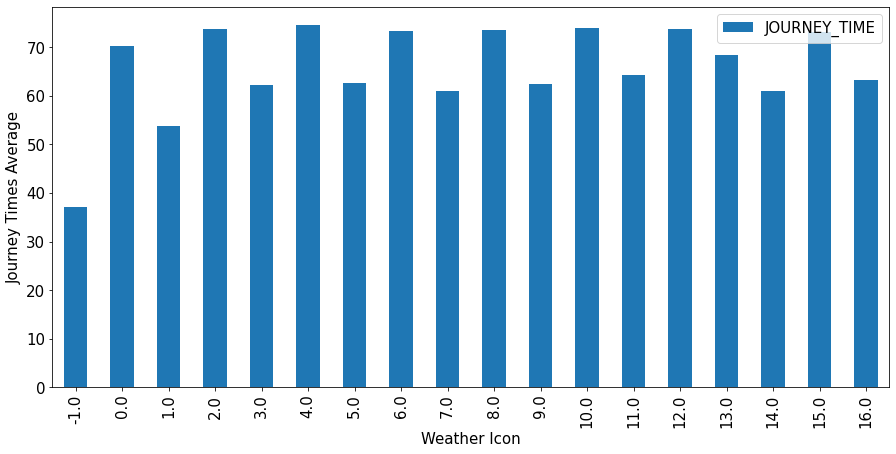

In [83]:
fortySixA1.groupby(by ="weather_icon").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Weather Icon")

- The original data for the weather was in the for 1n, 1d to denote differene for day and night as well as weather before being factorised. Hence whiy the chart goes up and down.
- The weather icon doesnt seem add much as the time of day will indicate whether it is day or night anyway and the weather description will indicate the weather.

<AxesSubplot:xlabel='Visibiliy Level', ylabel='Journey Times Average'>

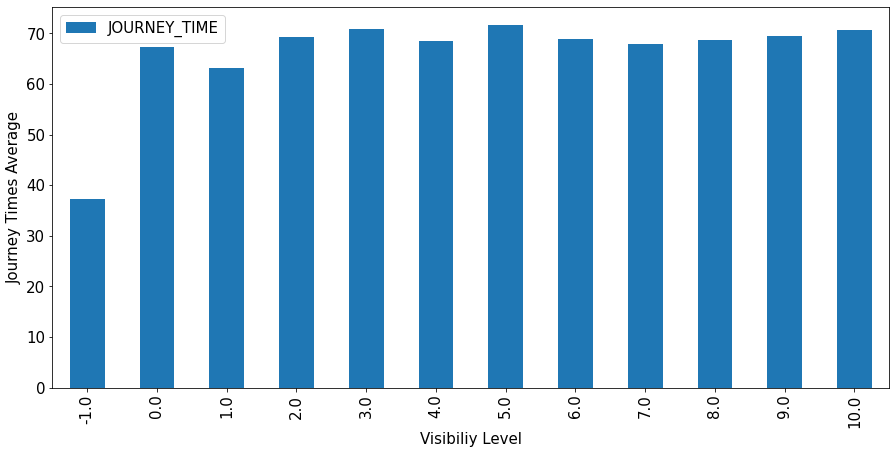

In [84]:
fortySixA1.groupby(by ="visibility").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Visibiliy Level")

- Visibility doesn't appear to have a clear influence on the target feature. The variance between each column is likely just a sample bias.
- It should be exceluded from the ML model.

<AxesSubplot:xlabel='Weather Description Category', ylabel='Journey Times Average'>

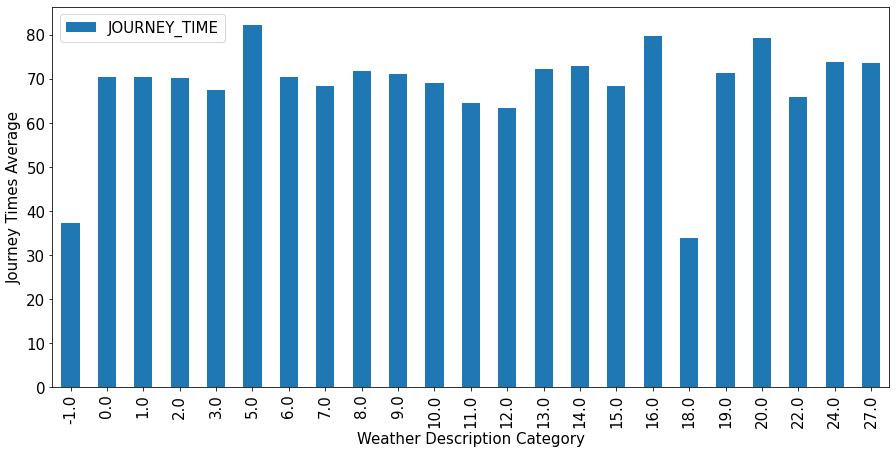

In [85]:
fortySixA1.groupby(by ="weather_description").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Weather Description Category")

- The order in which the weather description categories were factorised is not based on the severity so pay no attention to the order.
- There is some variance between different categories with one unusually short average journey time for category 18. I suspect this is on days of extreme weather when many routes may be closed.
- The feature appears to hold some value.

In [86]:
# setting random state to 0 as does not matter that order is the same each time once its shuffled
# setting test_size to 30%
# using sklearns train_test_split method
train_46, test_46 = train_test_split(fortySixA1, test_size=0.3, random_state=0)
train_145, test_145 = train_test_split(onefourfive, test_size=0.3, random_state=0)
train_16, test_16 = train_test_split(sixteen, test_size=0.3, random_state=0)

In [87]:
# resetting the indexes of both to start at 0 (preserves order generated above)
train_46 = train_46.reset_index(drop=True)
test_46 = test_46.reset_index(drop=True)

train_145 = train_145.reset_index(drop=True)
test_145 = test_145.reset_index(drop=True)

train_16 = train_16.reset_index(drop=True)
test_16 = test_16.reset_index(drop=True)

In [88]:
print("Training dataset for 46A has", train_46.shape[0], "rows and test dataset has", test_46.shape[0], "rows.")

print("Training dataset for 145 has", train_145.shape[0], "rows and test dataset has", test_145.shape[0], "rows.")

print("Training dataset for 16 has", train_16.shape[0], "rows and test dataset has", test_16.shape[0], "rows.")


Training dataset for 46A has 23588 rows and test dataset has 10110 rows.
Training dataset for 145 has 18124 rows and test dataset has 7768 rows.
Training dataset for 16 has 13688 rows and test dataset has 5867 rows.


In [89]:
# verify datatypes have remained intact
train_46.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
DAYOFWEEK                     category
HOUR_DEPARTURE                    int8
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_description            float64
weather_icon                   float64
LINE_DIRECTION                category
planned_journey_time           float64
error                          float64
dtype: object

In [90]:
predict_columns = ['HOUR_DEPARTURE', 'DAYOFWEEK', "temp", "weather_icon", "wind_speed", "weather_description"]
predictions = [feature for feature in predict_columns]
target = 'JOURNEY_TIME'

In [91]:
# initialise the RandomForestClassifier
# set random state value so that results can be replicated
forestReg_46 = RandomForestRegressor(n_estimators=100, max_depth=100,oob_score=True, random_state=1)

forestReg_145 = RandomForestRegressor(n_estimators=100, max_depth=100,oob_score=True, random_state=1)

forestReg_16 = RandomForestRegressor(n_estimators=100, max_depth=100,oob_score=True, random_state=1)


# fit the model on the training set using the predictions features
# y value is now the quantiles
forestReg_46.fit(train_46[predictions], train_46[target])

forestReg_145.fit(train_145[predictions], train_145[target])

forestReg_16.fit(train_16[predictions], train_16[target])

RandomForestRegressor(max_depth=100, oob_score=True, random_state=1)

In [92]:
feature_importance_46 = pd.DataFrame({'feature': train_46[predictions].columns, 'importance':forestReg_46.feature_importances_})
print("Feature Importance Random Forest Regressor for 46A: ")
feature_importance_46.sort_values('importance', ascending=False)

Feature Importance Random Forest Regressor for 46A: 


,feature,importance
0,HOUR_DEPARTURE,0.660909
1,DAYOFWEEK,0.141055
4,wind_speed,0.063915
2,temp,0.053398
3,weather_icon,0.041947
5,weather_description,0.038778


In [93]:
feature_importance_145 = pd.DataFrame({'feature': train_145[predictions].columns, 'importance':forestReg_145.feature_importances_})
print("Feature Importance Random Forest Regressor for 145:")
feature_importance_145.sort_values('importance', ascending=False)

Feature Importance Random Forest Regressor for 145:


,feature,importance
0,HOUR_DEPARTURE,0.602162
1,DAYOFWEEK,0.151266
4,wind_speed,0.083904
2,temp,0.064482
3,weather_icon,0.051794
5,weather_description,0.046393


In [94]:
feature_importance_16 = pd.DataFrame({'feature': train_46[predictions].columns, 'importance':forestReg_16.feature_importances_})
print("Feature Importance Random Forest Regressor for 16:")
feature_importance_16.sort_values('importance', ascending=False)

Feature Importance Random Forest Regressor for 16:


,feature,importance
0,HOUR_DEPARTURE,0.645864
1,DAYOFWEEK,0.146556
4,wind_speed,0.065178
2,temp,0.056150
3,weather_icon,0.045362
5,weather_description,0.040890


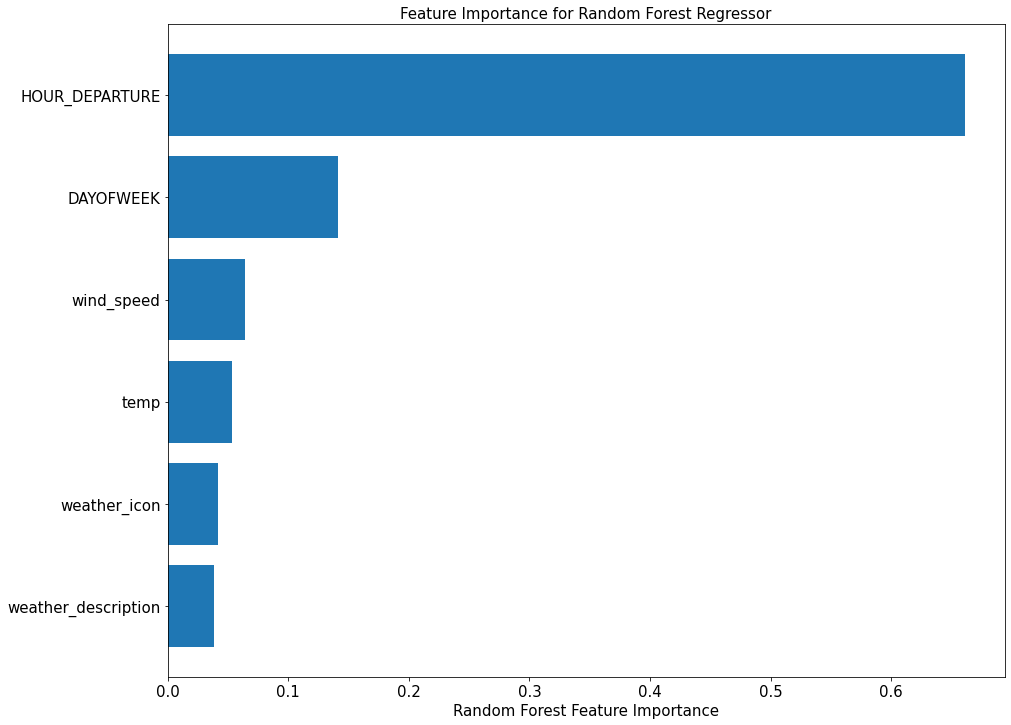

In [95]:
sorted_idx = forestReg_46.feature_importances_.argsort()
plt.figure(figsize=(15,12))
plt.barh(train_46[predictions].columns[sorted_idx], forestReg_46.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

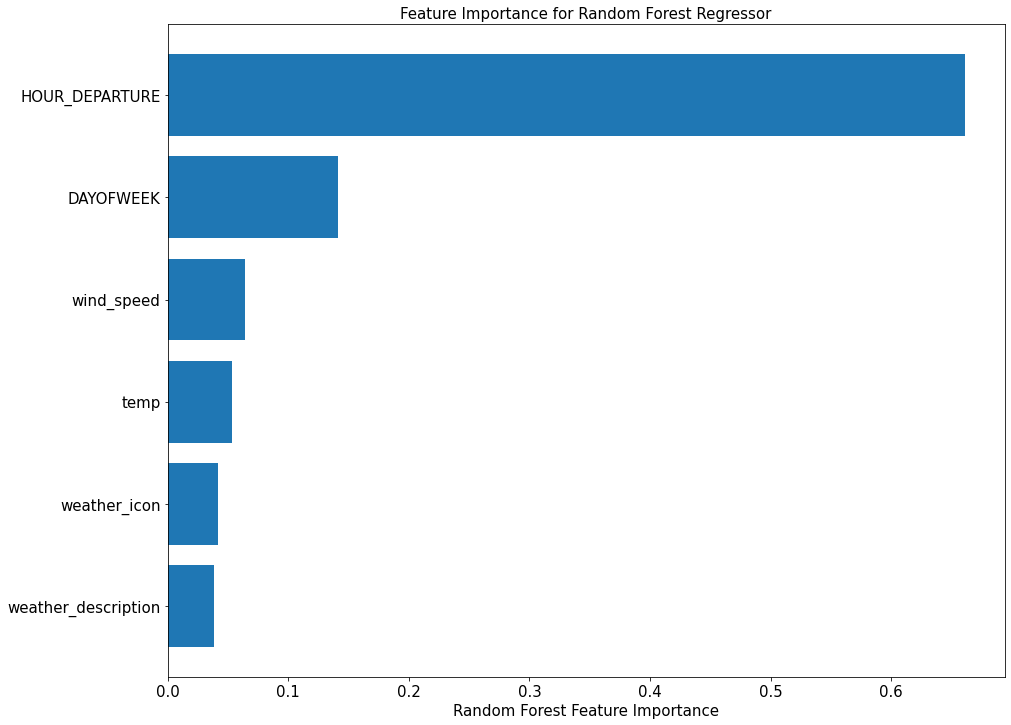

In [96]:
sorted_idx = forestReg_145.feature_importances_.argsort()
plt.figure(figsize=(15,12))
plt.barh(train_46[predictions].columns[sorted_idx], forestReg_46.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

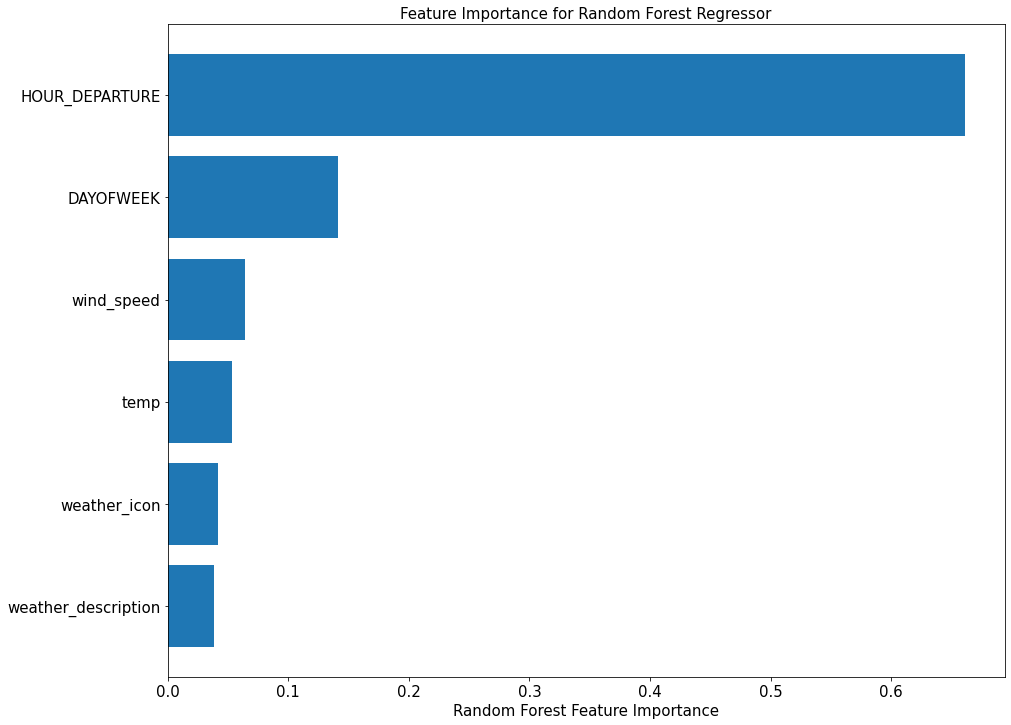

In [97]:
sorted_idx = forestReg_16.feature_importances_.argsort()
plt.figure(figsize=(15,12))
plt.barh(train_46[predictions].columns[sorted_idx], forestReg_46.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

In [98]:
forestRegPredictedTrain46_10 = forestReg_46.predict(test_46[predictions].head(10))
print("First 10 predictions with Random Forest Regression for Route 46a:")
predicted_df_train_reg_46 = pd.concat([test_46[target].head(10), pd.DataFrame(forestRegPredictedTrain46_10, columns=['Predicted Time'])], axis=1)
predicted_df_train_reg_46

First 10 predictions with Random Forest Regression for Route 46a:


,JOURNEY_TIME,Predicted Time
0,70.950000,71.120045
1,89.200000,93.341855
2,68.616667,63.721413
3,50.700000,60.580285
4,66.000000,68.246721
5,71.300000,64.581139
6,58.283333,56.098228
7,91.966667,71.982983
8,70.300000,74.783220
9,73.716667,73.571569


In [99]:
forestRegPredictedTrain145_10 = forestReg_145.predict(test_145[predictions].head(10))
print("First 10 predictions with Random Forest Regression for Route 145a:")
predicted_df_train_reg_145 = pd.concat([test_145[target].head(10), pd.DataFrame(forestRegPredictedTrain145_10, columns=['Predicted Time'])], axis=1)
predicted_df_train_reg_145

First 10 predictions with Random Forest Regression for Route 145a:


,JOURNEY_TIME,Predicted Time
0,84.600000,72.602159
1,79.366667,81.772196
2,65.283333,77.838451
3,71.866667,63.571360
4,99.700000,84.457587
5,101.033333,92.658327
6,62.283333,66.236228
7,82.250000,67.483185
8,84.833333,82.817155
9,63.516667,76.325360


In [100]:
forestRegPredictedTrain16_10 = forestReg_16.predict(test_16[predictions].head(10))
print("First 10 predictions with Random Forest Regression for Route 16:")
predicted_df_train_reg_16 = pd.concat([test_16[target].head(10), pd.DataFrame(forestRegPredictedTrain16_10, columns=['Predicted Time'])], axis=1)
predicted_df_train_reg_16

First 10 predictions with Random Forest Regression for Route 16:


,JOURNEY_TIME,Predicted Time
0,99.933333,93.031438
1,89.316667,92.255112
2,74.500000,76.243908
3,98.916667,99.732459
4,115.500000,108.926577
5,104.683333,105.471533
6,90.300000,72.917337
7,107.333333,102.899964
8,81.400000,91.963034
9,110.266667,118.852035


In [101]:
# predict entire training dataset using random forest regressor model
forestRegPredictedTrain = forestReg.predict(train[predictions])

NameError: name 'forestReg' is not defined

In [ ]:
# used to compute all metrics
def RegressionMetrics(actualVal, predictions, num_pred, num_samples):
    # classification evaluation measures
    print("MAE:", metrics.mean_absolute_error(actualVal, predictions))
    print("MAPE:", metrics.mean_absolute_percentage_error(actualVal, predictions))
    
    print("RMSE:", metrics.mean_squared_error(actualVal, predictions)**0.5)
    r2 = metrics.r2_score(actualVal, predictions)
    print("R2:", r2)
    print("Adjusted R2:", 1 - ((1-r2) * ((num_samples-1)/(num_samples-num_pred-1))))

In [ ]:
predictors = train[predictions].shape[1]
print("\u0332".join("Regression Evaluation Measures for Training Set"))
RegressionMetrics(train[target], forestRegPredictedTrain, predictors, train.shape[0])

In [ ]:
[estimator.get_depth() for estimator in forestReg.estimators_]

In [ ]:
leavetimes = pd.read_csv('rt_leavetimes_DB_2018.txt', sep=";", nrows=10000)

In [ ]:
leavetimes